In [1]:
from IPython.display import clear_output
!pip install transformers==2.11
clear_output()

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
import numpy as np
import pandas as pd
from transformers import *
import tensorflow as tf
import pickle
import scipy as sc
import math as mt
from sklearn.metrics.pairwise import cosine_similarity
import random
from random import randint
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
### Loading Wikipedia datasets
df_su = pd.read_csv('/content/Sundanese.csv', sep = ',')
df_sw = pd.read_csv('/content/sawahili.csv', sep = ',')
df_en = pd.read_csv('/content/English.csv', sep = ',')
df_es = pd.read_csv('/content/Spanish.csv', sep = ',')
df_ar = pd.read_csv('/content/Arabic.csv', sep = ',')
df_tr = pd.read_csv('/content/Turkish.csv', sep = ',')


In [36]:
###Loading mBERT
casing = "bert-base-multilingual-uncased"
tokenizer_mBERT = BertTokenizer.from_pretrained(casing, do_lower_case=True, add_special_tokens=True)
config = BertConfig(casing, output_hidden_states=True)
mBERT = TFBertModel.from_pretrained(casing)
mBERT.trainable = False

###Loading BERT
# casing = "bert-base-uncased" 
# config = BertConfig.from_pretrained(casing,output_hidden_states = True)
# tokenizer_BERT = BertTokenizer.from_pretrained(casing)
# BERT = TFBertModel.from_pretrained(casing, config = config)

###Loading RoBERTa
# casing = "roberta-base"
# tokenizer_RoBERTa = RobertaTokenizer.from_pretrained(casing)
# config = RobertaConfig.from_pretrained(casing)
# RoBERTa = TFRobertaModel.from_pretrained(casing, config=config)

###Loading XLM-R
# casing = 'xlm-roberta-base'
# tokenizer_XLM = AutoTokenizer.from_pretrained(casing)
# transformer_model = TFAutoModel.from_pretrained(casing, from_pt=True)


In [18]:
def text2rep(model, tokenizer, df, dimension = 768):

  representation = []
  for i in range(len(df)):

        inputs = tokenizer.encode(df['Sentence'].iloc[i], add_special_tokens=False)
        inputs = np.asarray(inputs, dtype='int32').reshape((1,-1))
        output = model(inputs)[0]
        for j in range(output.shape[1]):
            representation.append(output[0][j])

  return representation


In [50]:
def isotropy(representations):
    """Calculating isotropy of embedding space based on I_PC
           arg:
              representations (n_samples, n_dimensions)
            """

    eig_values, eig_vectors = np.linalg.eig(np.matmul(np.transpose(representations),
                                                      representations))
    max_f = -mt.inf
    min_f =  mt.inf

    for i in range(eig_vectors.shape[1]):
        f = np.matmul(representations, np.expand_dims(eig_vectors[:, i], 1))
        f = np.sum(np.exp(f))

        min_f = min(min_f, f)
        max_f = max(max_f, f)

    isotropy = min_f / max_f

    return isotropy

In [ ]:
def Cosine_Contribution(representation, n):
    contribution = []
    num = 1000
    for i in range(num):
      n1 = random.randint(0, len(representation)-1)
      n2 = random.randint(0, len(representation)-1)
      if n1 !=n2:
          contribution.append(np.multiply(representation[n1], representation[n2]) / 
                              (np.linalg.norm(representation[n1]) * np.linalg.norm(representation[n2])))
          
    sim = []
    for i in range(num):
      n1 = random.randint(0, len(representation)-1)
      n2 = random.randint(0, len(representation)-1)
      if n1 !=n2:
          sim.append(cosine_similarity(np.reshape(representation[n1], (1,-1)), np.reshape(representation[n2], (1, -1)))[0][0])

    ary = np.mean(contribution, axis=0) / np.mean(sim)

    return ary[np.argsort(ary)[-n:]]

In [ ]:
rep_su = text2rep(mBERT, tokenizer_mBERT, df_su)
rep_sw = text2rep(mBERT, tokenizer_mBERT, df_sw)
rep_en = text2rep(mBERT, tokenizer_mBERT, df_en)
rep_es = text2rep(mBERT, tokenizer_mBERT, df_es)
rep_ar = text2rep(mBERT, tokenizer_mBERT, df_ar)
rep_tr = text2rep(mBERT, tokenizer_mBERT, df_tr)

rep_en_mono = text2rep(BERT, tokenizer_BERT, df_tr)

In [ ]:
#### Randomly selecting 10000 representations
rd_su = random.sample(range(0, len(rep_su)), 10000)
rd_sw = random.sample(range(0, len(rep_sw)), 10000)
rd_en = random.sample(range(0, len(rep_en)), 10000)
rd_es = random.sample(range(0, len(rep_es)), 10000)
rd_ar = random.sample(range(0, len(rep_ar)), 10000)
rd_tr = random.sample(range(0, len(rep_tr)), 10000)

rd_en_mono = random.sample(range(0, len(rep_en_mono)), 10000)


In [ ]:
selected_su  = [rep_su[index] for index in rd_su]
selected_sw  = [rep_sw[index] for index in rd_sw]
selected_en  = [rep_en[index] for index in rd_en]
selected_es  = [rep_es[index] for index in rd_es]
selected_ar  = [rep_ar[index] for index in rd_ar]
selected_tr  = [rep_tr[index] for index in rd_tr]

selected_en_mono  = [rep_en_mono[index] for index in rd_en_mono]

In [ ]:
#### Saving Representations
np.save("selected_su.npy", np.asarray(selected_su))
np.save("selected_sw.npy", np.asarray(selected_sw))
np.save("selected_en.npy", np.asarray(selected_en))
np.save("selected_es.npy", np.asarray(selected_es))
np.save("selected_ar.npy", np.asarray(selected_ar))
np.save("selected_tr.npy", np.asarray(selected_tr))

np.save("selected_en_monoe.npy", np.asarray(selected_en_mono))

In [46]:
### Loading Representations
model = 'BERT'
selected_su = np.load('/content/drive/Shareddrives/Unlimited/multi-iso/'+model+'/selected_su.npy')
selected_sw = np.load('/content/drive/Shareddrives/Unlimited/multi-iso/'+model+'/selected_sw.npy')
selected_en = np.load('/content/drive/Shareddrives/Unlimited/multi-iso/'+model+'/selected_en.npy')
selected_es = np.load('/content/drive/Shareddrives/Unlimited/multi-iso/'+model+'/selected_es.npy')
selected_ar = np.load('/content/drive/Shareddrives/Unlimited/multi-iso/'+model+'/selected_ar.npy')
selected_tr = np.load('/content/drive/Shareddrives/Unlimited/multi-iso/'+model+'/selected_tr.npy')
selected_en_mono = np.load('/content/drive/Shareddrives/Unlimited/multi-iso/'+model+'/selected_en_monoe.npy')

In [ ]:
model_contribution =[]

model_contribution.append(Cosine_Contribution(selected_su, 3))
model_contribution.append(Cosine_Contribution(selected_sw, 3))
model_contribution.append(Cosine_Contribution(selected_en, 3))
model_contribution.append(Cosine_Contribution(selected_es, 3))
model_contribution.append(Cosine_Contribution(selected_ar, 3))
model_contribution.append(Cosine_Contribution(selected_tr, 3))
model_contribution.append(Cosine_Contribution(selected_en_mono, 3))

model_contribution = np.asarray(model_contribution)

t_file = open(model+"-contribution.txt", "w")
for row in model_contribution:
    np.savetxt(t_file, row)

t_file.close()


In [51]:
isotropy(selected_su)

0.00012216606

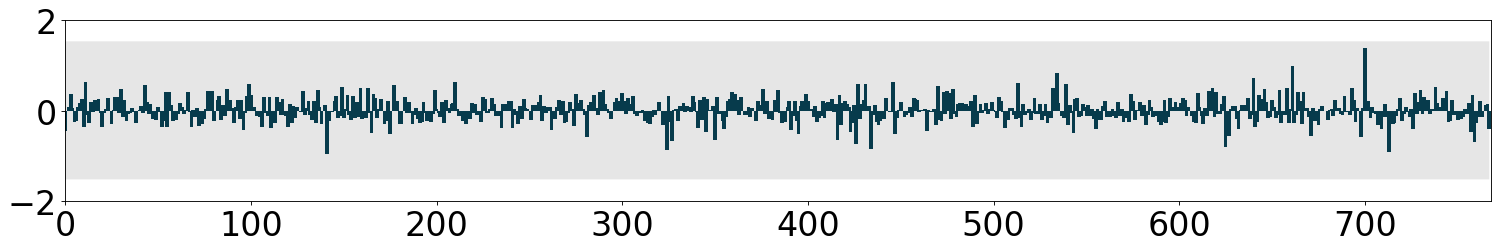

In [48]:
#### Visualization


plt.rcParams["figure.figsize"] = (30,3)
x = np.arange(dimension)

st = np.std(selected_su)*3
m = np.mean(selected_su)
x = np.arange(dimension)

figure(figsize=(23, 3), dpi=80)
fig= plt.bar(x,np.mean(selected_su, axis = 0), color='#073b4c',width=2)
plt.xlim([0, dimension])
plt.ylim([-2, 2])
plt.xticks(fontsize=30 )
clrs = sns.color_palette("pastel", 8)
plt.yticks(fontsize=30 )
plt.yticks(np.arange(-2, 2.1, 2))
plt.fill_between(x, m-st, m+st ,alpha=0.5, facecolor=clrs[7])

plt.show()